In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

class Gradient_Descent:
    
    def __init__(self, test_size, param_a, param_b, lr, nb_iters, noise=True):
        self.test_size = test_size
        self.parameter_a = param_a
        self.parameter_b = param_b
        self.mse_hist=[]
        self.bias_hist=[]
        self.weight1_hist=[]
        self.noise = noise
        self.X = np.random.randint(-10, 10, (self.test_size, 1)) + np.random.normal(loc=0, scale=1, size=(self.test_size, 1))
        if noise == True:
            self.e = 5*(np.random.normal(loc=0, scale=1, size=(self.test_size, 1)))
        else:
            self.e = np.zeros((self.test_size, 1))
        self.y = self.e + (self.parameter_a*self.X + self.parameter_b)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=42)
        self.weight_1 = np.random.randint(0, 10)
        self.bias = np.random.randint(0, 10)
        self.lr = lr
        self.length = nb_iters
        
        
    def optimize(self):
        
        for iteration in range(self.length):
            pred = []
            x = np.dot(self.X_train, self.weight_1) + self.bias
            pred.append(x)
            pred = np.array(pred).reshape(self.y_train.shape[0],1)

            error = np.subtract(pred, self.y_train)
            mse = mean_squared_error(self.y_train, pred)
            self.mse_hist.append(mse)  
            
            slope_weight = (np.dot(self.X_train.T, error))/self.y_train.shape[0]
            for iter_1 in range(1500):
                self.weight_1 = self.weight_1 - self.lr*slope_weight
            self.weight1_hist.append(self.weight_1)
            
            slope_bias = error/self.y_train.shape[0]
            for iter_2 in range(5000):
                for slope_bias_value in slope_bias:
                    self.bias = self.bias - self.lr*slope_bias_value*5
            self.bias_hist.append(self.bias)

            plt.scatter(self.X_train, self.y_train)
            t = np.linspace(-10, 10, 400)
            a = self.parameter_a*(t)+self.parameter_b
            b = float(self.weight_1)*(t) + float(self.bias)

        plt.plot(t, b, 'b')    
        plt.plot(t, a, 'r')  
        plt.show()
        
        self.bias_hist=list(np.array(self.bias_hist).reshape(self.length,))
        self.weight1_hist=list(np.array(self.weight1_hist).reshape(self.length,))
    def plot_params(self):
        plt.plot(self.weight1_hist)
        plt.plot(self.bias_hist)
        plt.show()
    def r2_score(self):
        self.y_pred = np.dot(self.X_test, self.weight_1) + self.bias
        score = r2_score(self.y_test, self.y_pred)
        print(score)
    def params(self):
        print("Parameter a: " + str(float(self.weight_1)))
        print("Parameter b: " + str(float(self.bias)))
        

In [103]:
test = Gradient_Descent(100, 2, 3, 0.00001, 300, noise=False)

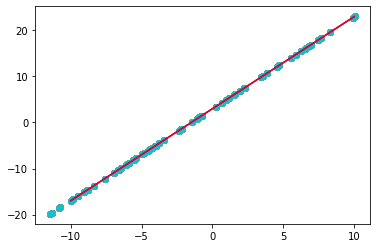

In [104]:
test.optimize()

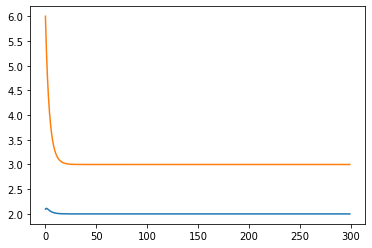

In [105]:
test.plot_params()

In [106]:
test.r2_score()

1.0


In [107]:
test.params()

Parameter a: 2.0000000000086597
Parameter b: 3.0000000002021303
